### Simulation

The previous files hold the symbolic equations of motion that we need to represent the system. Now, we must transform them into Python functions to be able to use in numerical integration.

In [2]:
# Loading previous solutions
from equations_of_motion_solution import *
from sympy.physics.vector import vlatex
from sympy import init_printing
from IPython.display import Image
init_printing(use_latex='mathjax', pretty_print=False)

In [2]:
# Import NumPy functions to setp the numerical values and integrate the equations of motion
from numpy import deg2rad, rad2deg, array, zeros, linspace

# Import ODE numerical integration routine from SciPy
from scipy.integrate import odeint

# Import PyDy's ODE function generation to generate the symbolic equations into numerical function
from pydy.codegen.ode_function_generators import generate_ode_function

# Import a few functions from Matplotlib.PyPlot
from matplotlib.pyplot import plot, legend, xlabel, ylabel, rcParams
%matplotlib inline

#### Variables
Now, we will need to gather the variables, in the equations of motions into lists, i.e. constants, coordinates, speeds and specific inputs.

#### Constants

There are 21 constants in the equations:

In [3]:
constants = [lower_arm_length,
             lower_arm_com_length,
             lower_arm_mass,
             lower_arm_inertia,
             upper_arm_length,
             upper_arm_com_length,
             upper_arm_mass,
             upper_arm_inertia,
             hand_length,
             hand_com_length,
             hand_mass,            
             hand_inertia,
             finger1_length,
             finger1_com_length,
             finger1_mass,
             finger1_inertia,
             finger2_length,
             finger2_com_length,
             finger2_mass,
             finger2_inertia,           
             g]
constants

[l_L, d_L, m_L, I_Lz, l_U, d_U, m_U, I_Uz, l_H, d_H, m_H, I_Hz, l_F1, d_F1, m_F1, I_F1z, l_F2, d_F2, m_F2, I_F2z, g]

#### Time varying variables

The states are dependant of the coordinates and speeds. There are 15 varying specified inputs to the system

In [7]:
coordinates = [lambda1, lambda2, lambda3, lambda4, lambda5]

speeds = [omega1, omega2, omega3, omega4, omega5]

specifieds = [ground_joint_torque, lower_arm_joint_torque, upper_arm_joint_torque, hand_joint_torque, finger1_joint_torque, finger2_joint_torque]

#### Generating the ODE function

The ordinary differential equation integrator scipy.integrate.odeint require a function that numerically evaluates the right hand side of the coupled first order ordinary differential equations. In `mass_matrix` and `forcing_vector` are the symbolic form of the constants and variables. `odeint` function requires the right hand side function, the initial conditions and a time vector. 

In [11]:
# Passing the RHS to the ODE function generator
right_hand_side = generate_ode_function(forcing_vector, coordinates, speeds, constants, mass_matrix=mass_matrix, specifieds=specifieds)

# Setting the speeds and coordinates initial conditions 
x0 = zeros(10)

# Speeds initial conditions are zero, while the lower arm, upper arm and hand generalized coordinates are on an 20° angle. The fingers are on a 20° angle with respect to the hand axis.
x0[5:8] = deg2rad(20)
x0[8] = deg2rad(-20) # Bottom finger
x0[9] = deg2rad(20) # Top finger

Now, we need to specify the numerical value for all constants. To work with realistic values, a 3D CAD geometry was design to model the robot arm. The material of the 4 part robot arm is made structural steel.

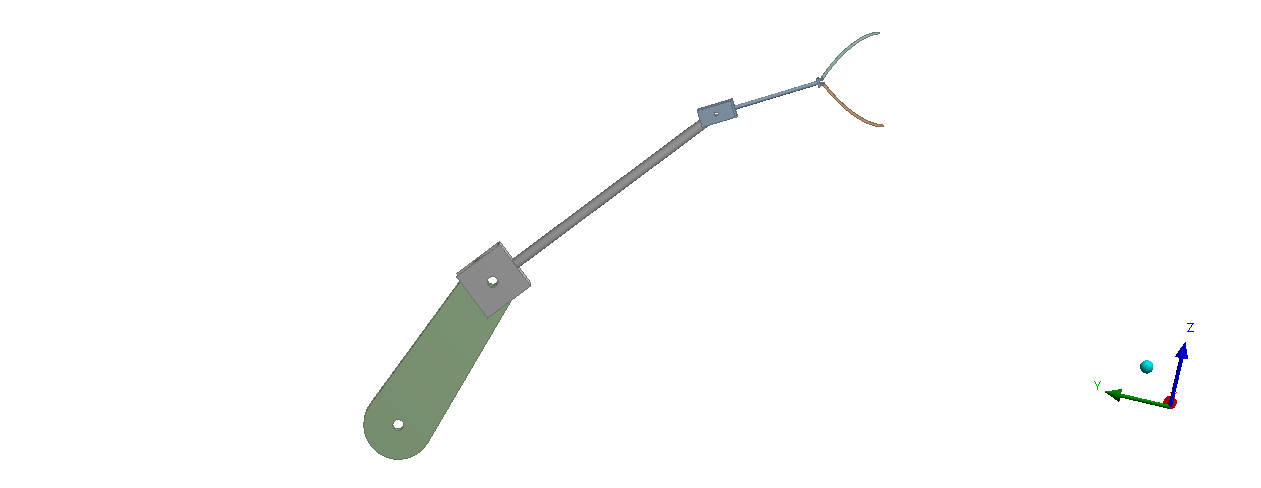

In [3]:
Image('https://user-images.githubusercontent.com/60149913/106359945-340cf380-62ec-11eb-8b14-1b2dfe42aa22.png', width=516, height=200)

In [ ]:
Image('https://user-images.githubusercontent.com/60149913/106360132-2e63dd80-62ed-11eb-8d96-7483cf61319d.png', width=332, height=150)
Image('https://user-images.githubusercontent.com/60149913/106360135-302da100-62ed-11eb-8fef-fde1e60e99a4.png', width=332, height=150)
Image('https://user-images.githubusercontent.com/60149913/106360139-315ece00-62ed-11eb-8c7f-9cdb1302a96c.png', width=332, height=150)
Image('https://user-images.githubusercontent.com/60149913/106360140-31f76480-62ed-11eb-9abe-3f68f702a072.png', width=332, height=150)